In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing New\gurgaon_properties_post_feature_selection_wo_onehot_features.parquet')

In [3]:
df = df[~(df['Property Age'] == 'Under Construction')]

In [4]:
df.shape

(9588, 20)

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
X.head(2)

,Sector,Built Up Area,Bedroom,Bathroom,Balcony,Servant Room,Store Room,Study Room,Floor Num,Total Floor,Property Age,Furnishing,Power Backup,Covered_Parking,Open_Parking,Total Parking,Rating,Nearby,Overlooking
0,Sector 81,1031,2,2,2,0,0,0,10,14,5 to 10 Year Old,Semi Furnished,Full,1,0,1,3.60,Education,Club
1,Sector 92,1305,3,3,2,1,0,1,6,7,5 to 10 Year Old,Semi Furnished,Full,1,0,1,3.74,Healthcare,Club


In [8]:
y.head(2)

0    1.05
1    1.29
Name: Price, dtype: float32

In [9]:
print(X.shape)
print(y.shape)

(9588, 19)
(9588,)


In [10]:
X.columns

Index(['Sector', 'Built Up Area', 'Bedroom', 'Bathroom', 'Balcony',
       'Servant Room', 'Store Room', 'Study Room', 'Floor Num', 'Total Floor',
       'Property Age', 'Furnishing', 'Power Backup', 'Covered_Parking',
       'Open_Parking', 'Total Parking', 'Rating', 'Nearby', 'Overlooking'],
      dtype='object')

In [11]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder

In [12]:
X.head(1)

,Sector,Built Up Area,Bedroom,Bathroom,Balcony,Servant Room,Store Room,Study Room,Floor Num,Total Floor,Property Age,Furnishing,Power Backup,Covered_Parking,Open_Parking,Total Parking,Rating,Nearby,Overlooking
0,Sector 81,1031,2,2,2,0,0,0,10,14,5 to 10 Year Old,Semi Furnished,Full,1,0,1,3.6,Education,Club


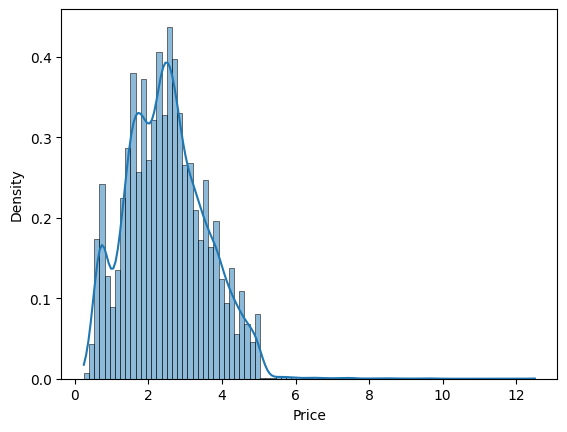

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Price'], kde= True, stat= 'density')
plt.show()

In [14]:
df[df['Price'] > 5.51].shape

(30, 20)

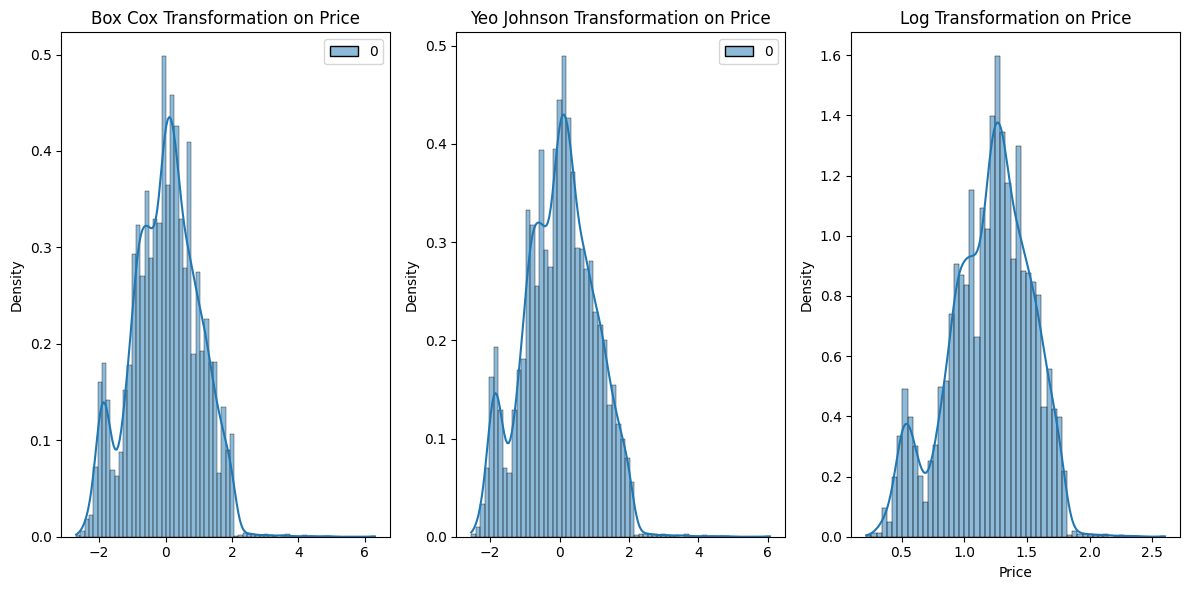

In [15]:
from sklearn.preprocessing import PowerTransformer

pt_box = PowerTransformer(method= 'box-cox')
pt_yeo = PowerTransformer(method= 'yeo-johnson')

y_box_transformed = pt_box.fit_transform(df[['Price']])
y_yeo_transformed = pt_yeo.fit_transform(df[['Price']])

plt.figure(figsize= (12, 6))

plt.subplot(1, 3, 1)
sns.histplot(y_box_transformed, kde= True, stat= 'density')
plt.title("Box Cox Transformation on Price")

plt.subplot(1, 3, 2)
sns.histplot(y_yeo_transformed, kde= True, stat= 'density')
plt.title("Yeo Johnson Transformation on Price")

plt.subplot(1, 3, 3)
sns.histplot(np.log1p(df['Price']), kde= True, stat= 'density')
plt.title("Log Transformation on Price")

plt.tight_layout()
plt.show()

In [16]:
log_skew = np.log1p(df['Price']).skew()
log_kurtosis = np.log1p(df['Price']).kurt()

yeo_skew = pd.Series(y_yeo_transformed.flatten()).skew()
yeo_kurtosis = pd.Series(y_yeo_transformed.flatten()).kurt()

box_skew = pd.Series(y_box_transformed.flatten()).skew()
box_kurtosis = pd.Series(y_box_transformed.flatten()).kurt()

# --- Print the comparison ---
print(f"Log Transformed Skewness: {log_skew:.4f}")
print(f"Log Transformed Kurtosis: {log_kurtosis:.4f}")
print("-" * 40)
print(f"Yeo-Johnson Skewness: {yeo_skew:.4f}")
print(f"Yeo-Johnson Kurtosis: {yeo_kurtosis:.4f}")
print("-" * 40)
print(f"Box-Johnson Skewness: {box_skew:.4f}")
print(f"Box-Johnson Kurtosis: {box_kurtosis:.4f}")

Log Transformed Skewness: -0.3939
Log Transformed Kurtosis: -0.1704
----------------------------------------
Yeo-Johnson Skewness: -0.0105
Yeo-Johnson Kurtosis: -0.1137
----------------------------------------
Box-Johnson Skewness: -0.0275
Box-Johnson Kurtosis: -0.0183


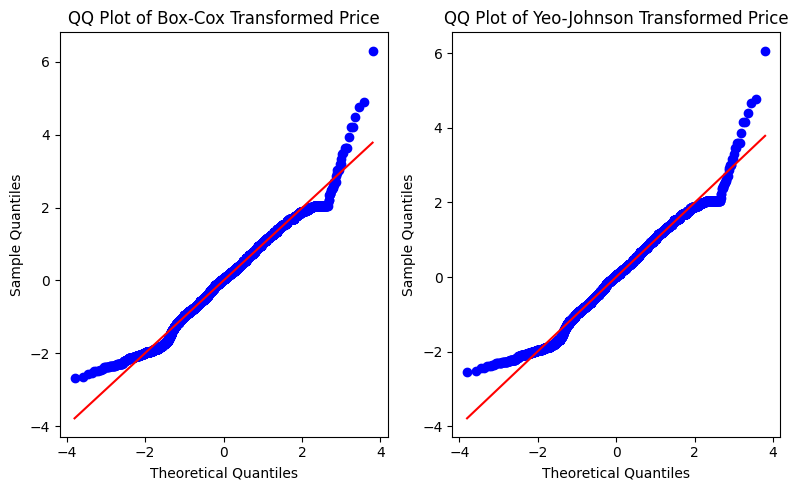

In [17]:
import scipy.stats as stats

plt.figure(figsize= (8, 5))
plt.subplot(1, 2, 1)
stats.probplot(y_box_transformed.flatten(), dist= 'norm', plot= plt)
plt.title('QQ Plot of Box-Cox Transformed Price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.subplot(1, 2, 2)
stats.probplot(y_yeo_transformed.flatten(), dist= 'norm', plot= plt)
plt.title('QQ Plot of Yeo-Johnson Transformed Price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

In [18]:
df.head(1)

,Sector,Built Up Area,Bedroom,Bathroom,Balcony,Servant Room,Store Room,Study Room,Floor Num,Total Floor,Property Age,Furnishing,Power Backup,Covered_Parking,Open_Parking,Total Parking,Rating,Nearby,Overlooking,Price
0,Sector 81,1031,2,2,2,0,0,0,10,14,5 to 10 Year Old,Semi Furnished,Full,1,0,1,3.6,Education,Club,1.05


In [19]:
df['Furnishing'] = df['Furnishing'].str.strip()
df['Property Age'] = df['Property Age'].str.strip()
df['Power Backup'] = df['Power Backup'].str.strip()

In [20]:
ordinal_features = ['Property Age', 'Power Backup', 'Furnishing']

In [21]:
property_age_categories = ['10+ Year Old', '5 to 10 Year Old', '1 to 5 Year Old', '0 to 1 Year Old']
power_backup_categories = ['None', 'Partial', 'Full']
furnishing_categories = ['Unfurnished', 'Semi Furnished', 'Furnished']

In [22]:
onehot_features = ['Nearby', 'Overlooking', 'Sector']
numeric_features = ['Built Up Area', 'Bedroom', 'Bathroom', 'Balcony', 'Floor Num', 'Total Floor', 'Rating']

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories= [property_age_categories, power_backup_categories, furnishing_categories]), ordinal_features),
        ('onehot', OneHotEncoder(handle_unknown= 'ignore', drop= 'first', sparse_output= False), onehot_features),
        ('numeric', StandardScaler(), numeric_features)
    ],
    remainder= 'passthrough'
)

In [24]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', TransformedTargetRegressor(
            regressor= SVR(kernel= 'rbf'),
            transformer= PowerTransformer(method= 'box-cox')
        ))
    ])

In [25]:
# Add the error_score='raise' parameter
scores = cross_val_score(pipeline, X, y, cv=10, scoring='r2', error_score='raise')

c:\Users\aryan\OneDrive\Desktop\Capstone Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aryan\OneDrive\Desktop\Capstone Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aryan\OneDrive\Desktop\Capstone Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aryan\OneDrive\Desktop\Capstone Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zer

In [26]:
print(f"Scores for each fold: {scores}")

print(f"\nAverage R2 Score: {scores.mean():.4f}")
print(f"Standard Deviation of Scores: {scores.std():.4f}")

Scores for each fold: [0.87114468 0.86969962 0.8759628  0.72988506 0.88650937 0.90477817
 0.84583464 0.86927396 0.81093334 0.85080998]

Average R2 Score: 0.8515
Standard Deviation of Scores: 0.0471


In [27]:
rmse_scores = cross_val_score(pipeline, X, y, cv=10, scoring='neg_root_mean_squared_error')

c:\Users\aryan\OneDrive\Desktop\Capstone Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aryan\OneDrive\Desktop\Capstone Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aryan\OneDrive\Desktop\Capstone Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\aryan\OneDrive\Desktop\Capstone Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zer

In [28]:
positive_rmse_scores = -rmse_scores

In [29]:
avg_rmse = positive_rmse_scores.mean()
std_rmse = positive_rmse_scores.std()

In [30]:
print(f"Scores for each fold (RMSE in crores): {np.round(positive_rmse_scores, 2)}")
print("-" * 40)
print(f"Average RMSE: {avg_rmse:.4f} crores")
print(f"Standard Deviation of RMSE: {std_rmse:.4f} crores")

Scores for each fold (RMSE in crores): [0.35 0.37 0.34 0.63 0.34 0.32 0.39 0.39 0.48 0.42]
----------------------------------------
Average RMSE: 0.4046 crores
Standard Deviation of RMSE: 0.0875 crores
